# CAB420, Practical 4, Question 1 Template
## Implementing an AlexNet-Like Network

Deep Neural Networks have exploded in popularity in recent years due to their impressive performance. For the most part, neural networks are very adaptable and a network that performs well on one task will perform similarly well on another similar task (here, we can consider both tasks being image classification to make them sufficiently similar), assuming that other factors such as dataset characteristics are similar. Given this, it is very common to see the same, or very similar architecture used over and over again. These architectures are typically based on large models that have performed well (or won) a popular image classification benchmark, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC).

The first deep network to win the ILSVRC challenge was [AlexNet](https://proceedings.neurips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf). The structure of AlexNet is shown in the prac sheet, and consists of:
* An input, of size $224 \times 224 \times 3$ (i.e. a 224 pixel wide, by 224 pixel high, colour image).
* A 2D Convolution layer with $96$ $11 \times 11$ sized filters, followed by max pooling layer that operates over a $4\times 4$ region.
* A 2D Convolution layer with $256$ $5 \times 5$ sized filters, followed by a max pooling layer.
* A 2D Convolution layer, with $384$ $3 \times 3$ size filters.
* A 2D Convolution layer, with $384$ $3 \times 3$ size filters.
* A 2D Convolution layer, with $256$ $3 \times 3$ size filters.
* A fully connected (or dense) layer with $4096$ units.
* A fully connected (or dense) layer with $4096$ units.
* An output fully connected (or dense) layer, with $1000$ units (for the $1000$ classes in ImageNet).

Using this network on the CIFAR-10 dataset is not practical, but we can adapt the AlexNet architecture to CIFAR-10. You are to create a network of a similar style AlexNet, but tailored for CIFAR-10. A suggested approach would be:
* Use three 2D convolution layers (with max pooling in between), with filters of decreasing size, but increasing in number in similar ratios to AlexNet (i.e. the first convolution layer has 8 $7\times 7$ filters, the second has 24 $5\times 5$ filters, the third has 32 $3 \times 3$ filters). Use $4\times 4$ max pooling after the first layer, and $2\times 2$ after the second.
* Use two dense (fully connected) layers, one with $512$ units after the convolution layers, and then a final classification layer with $10$ units (i.e. the number of output classes).
* Use relu activations throughout, except for your output layer which should use a soft-max layer.

Train the network on the CIFAR-10 dataset, and evaluate the performance. When training the model, be sure to consider the dataset size ($50,000$ training samples) and batch size when selecting how many epochs to train for. Assuming you're using an optimiser such as Adam with default values, $\approx5000$ iterations will likely be sufficient to train your network to near convergence. After training, plot the training and validation losses and accuracies to observe if the model has converged, or is overfitting.

### Relevant Examples

The DCNN examples from this week, in particular ``CAB420_DCNNs_Example_1_Classification_with_Deep_Learning.ipynb`` is a good starting point and has examples of how to build and train a neural network.

### Suggested Packages

TensorFlow and Keras are your friends here. Matplotlib and maybe seaborn will be good for plotting, and sklearn also provides some useful functionality for confusion matricies and accuracy metrics.

In [1]:
# why is this here? This is disabling some tensorflow warning I get in some of my environments that 
# annoy me (look ugly and untidy really)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import keras
from keras import layers
from keras.utils import to_categorical

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import numpy

## Loading the Data

CIFAR-10 is built into keras, so we can load that directly. Note that we will:
* Convert the y-data to categoricals
* Plot some example images as a sanity check

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


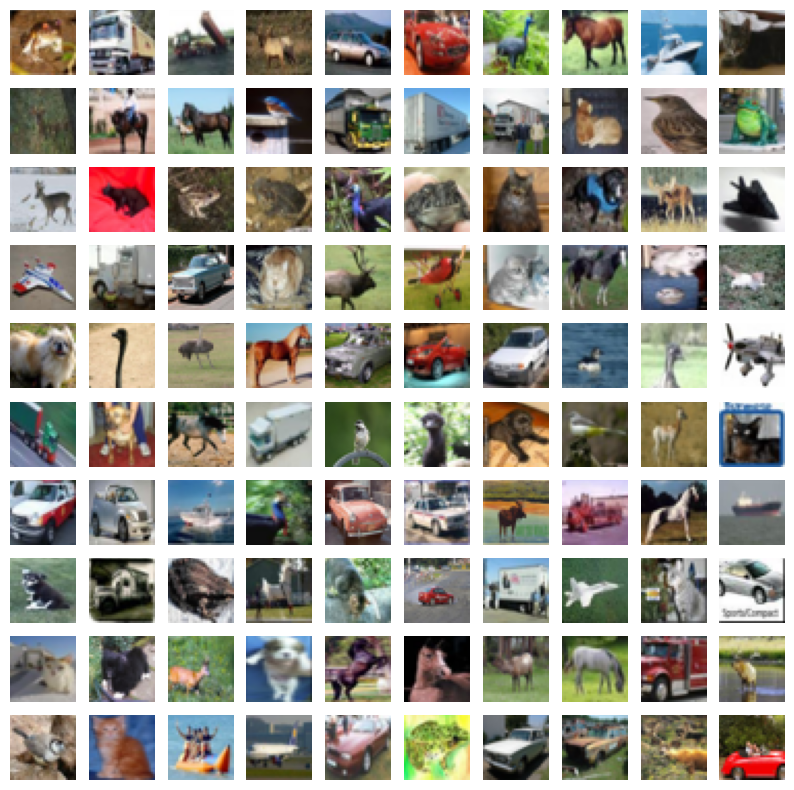

In [2]:
# load the data through the keras API
(train, train_y), (test, test_y) = keras.datasets.cifar10.load_data()

# convert the y-data to categoricals
print(train_y[0:10])
train_y = to_categorical(train_y, 10)
print(train_y[0:10,:])
test_y = to_categorical(test_y, 10)

# plot some images
fig = plt.figure(figsize=[10, 10])
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(train[i,:,:,:])
    ax.axis('off')

## Building The Network

Now you need to build your network. The input will be images of size (32, 32, 3), and the output will be a dense layer of size 10, with a softmax activation.

In [31]:
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3. (vectorised data)
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# put the rest of the network in here. More layers = more overfitting. Combat this by using dropout (dropout2D etc) between layers

#Learns filters (patterns). passes this over the image. More filters = more patterns. Only stack 2D 2 at a time. (there is one at a time here)
#get high responses where the filters matches the underlying image, and low where it doesnt. Use that to find thing of interest (clothing etc in image)
x = layers.Conv2D(filters=32, kernel_size=(7,7), activation='relu', padding='same')(inputs) 
x = layers.MaxPool2D(pool_size=(2, 2))(x) #Dimensino reduction operation. takes max value of conv2d. (most important things/things of interest)
x = layers.Conv2D(filters=96, kernel_size=(5,5), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)

# the output, 10 neurons for 10 classes
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
model_alexnet = keras.Model(inputs=inputs, outputs=outputs, name='alexnet_for_cifar10')
model_alexnet.summary()

Model: "alexnet_for_cifar10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 96)     │        76,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,392,298 (16.76 MB)

 Trainable params: 4,392,298 (16.76 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Network

Now you need to train the network. The compile function has been given to you, but you'll need to determine the batch size and number of epochs to use when doing the fit.

In deciding this you should consider:
* What batch size do you wish to use? In general, larger batch sizes are better as they are more representitive of the data, but larger batches take more memory and longer to process
* How many iterations will you train your model for? You will need to train for a few thousand iterations (or more) to see convergence.

In [32]:
model_alexnet.compile(
    # categorical cross entropy loss
    loss='categorical_crossentropy',
    # adam optimiser
    optimizer=keras.optimizers.Adam(),
    # compute the accuracy metric, in addition to the loss 
    metrics=['accuracy'], jit_compile=False)

# train the model
# add your batch size and number of epochs here
#scarce classes can get lost amongst large batch sizes.

history = model_alexnet.fit(train, train_y,
                    batch_size=512,
                    epochs=50,
                    validation_data=(test, test_y), verbose=True, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                                                                           patience=5, verbose=0,
                                                                                                           mode="auto",
                                                                                                           restore_best_weights=True,
                                                                                                           start_from_epoch=5)])

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.2206 - loss: 24.8107 - val_accuracy: 0.4657 - val_loss: 1.4908
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.4953 - loss: 1.4178 - val_accuracy: 0.5416 - val_loss: 1.3015
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5737 - loss: 1.2073 - val_accuracy: 0.5781 - val_loss: 1.2016
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.6382 - loss: 1.0383 - val_accuracy: 0.5885 - val_loss: 1.1645
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.6871 - loss: 0.9031 - val_accuracy: 0.5986 - val_loss: 1.1425
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7402 - loss: 0.7497 - val_accuracy: 0.6158 - val_loss: 1.1484
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8040 - loss: 0.5807 - val_accuracy: 0.6178 - val_loss: 1.2091
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8561 - loss: 0.4334 - val_accuracy: 0.6099 -

## Evaluation

You've been provided code to evalaute your model. There is code to:
* Explore training convergence, by exploring the loss and accuracy on the training and validation data
* Plot confusion matrices for the training and testing set, and compute F1 scopes.

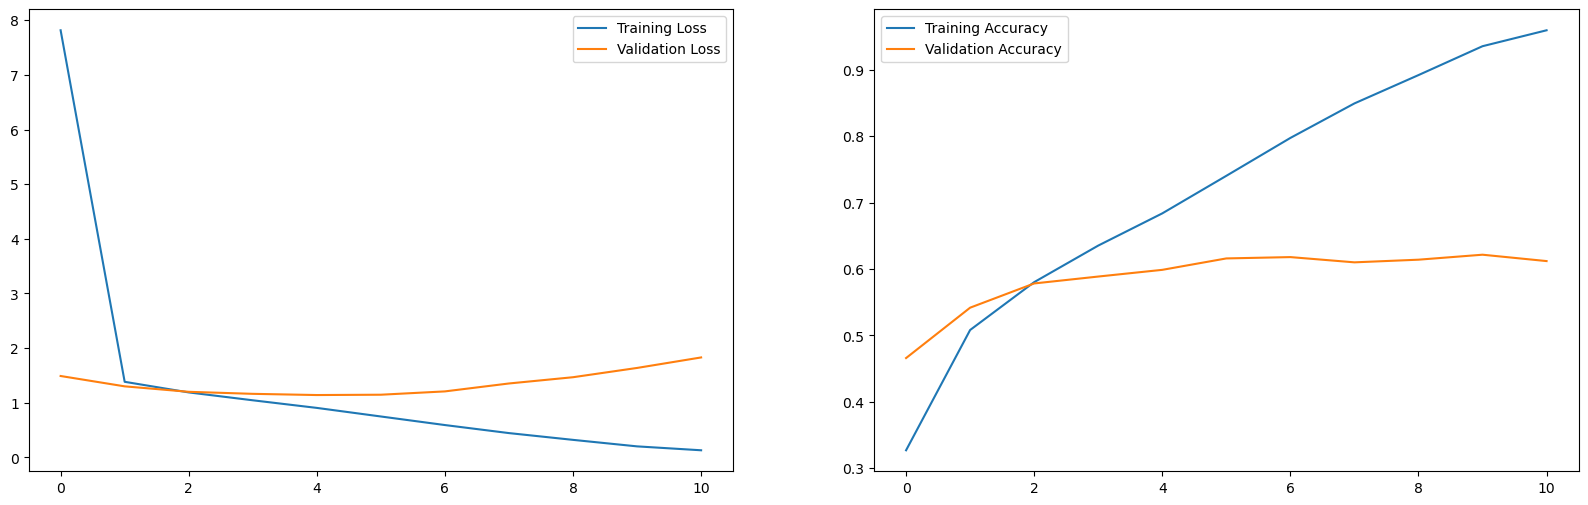

In [33]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label="Training Loss")
ax.plot(history.history['val_loss'], label="Validation Loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label="Training Accuracy")
ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
ax.legend()

In [34]:
output = model_alexnet.predict(test[0:1, :])
print(output)
print(test_y[0,:])

output = model_alexnet.predict(test[1:2, :])
print(output)
print(test_y[1,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
[[1.9237912e-03 2.3460859e-03 5.5624428e-03 9.2027473e-01 4.8789941e-03
  3.4477990e-02 1.5632343e-02 4.3260999e-04 1.0168712e-02 4.3022740e-03]]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[8.5427379e-03 5.2093428e-01 3.8878643e-06 3.7326685e-05 2.0433741e-05
  9.8520593e-07 4.6827936e-05 1.2959276e-07 4.6605045e-01 4.3629315e-03]]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [35]:
def eval_model(model, train, train_y, test, test_y):
    fig = plt.figure(figsize=[20, 8])    

    ax = fig.add_subplot(1, 2, 1)    
    # predict on the training set
    pred = model.predict(train, verbose=False);
    # get indexes for the predictions and ground truth, this is converting back from a one-hot representation
    # to a single index
    indexes = keras.ops.argmax(pred, axis=1)
    gt_idx = keras.ops.argmax(train_y, axis=1)

    # plot the confusion matrix, I'm using tensorflow and seaborn here, but you could use
    # sklearn as well
    confusion_mtx = confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    # set the title to the F1 scope
    ax.set_title('Training, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

    # repeat visualisation for the test set
    ax = fig.add_subplot(1, 2, 2)  
    pred = model.predict(test, verbose=False);
    indexes = keras.ops.argmax(pred, axis=1)
    gt_idx = keras.ops.argmax(test_y, axis=1)

    confusion_mtx = confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Testing, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

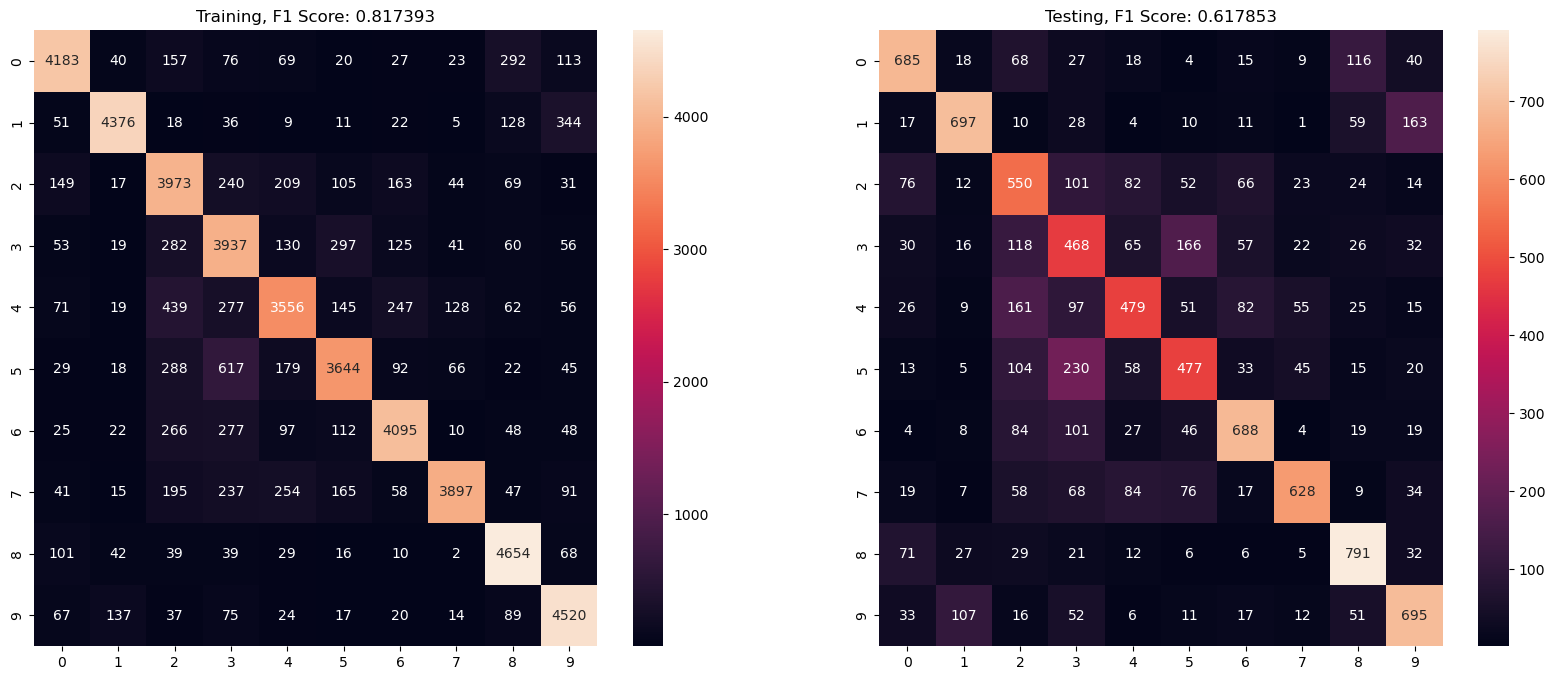

In [36]:
eval_model(model_alexnet, train, train_y, test, test_y)